In [9]:
from random import uniform
from math import pi, cos, sin
import matplotlib.pyplot as plt
%matplotlib inline

# Генераторы Пети

## Генератор 1

In [10]:
def generate1():
    a = uniform(0, 1)
    b = uniform(0, 1)
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))

Полярная система координат a - радиус (0, 1), b - коэффициент угла

## Генератор 2

In [11]:
def generate2():
    while True:
        x = uniform(-1, 1)
        y = uniform(-1, 1)
        if x ** 2 + y ** 2 > 1:
            continue
        return (x, y)

Рандомно берм точку (x, y) и проверяем условие нахождения в окружности

# Как отличить один набор от другого?

Генератор 2 (x, y) выбираем рандомно => заполнение окружности будет равномерно => радиус средней окружности равен 0,5

Генератор 1 (r, alpha) выбираем рандомно => к верху окружность больше пространства => плотность точек ниже

In [47]:
point_1 = [generate1() for _ in range(1000)]
point_2 = [generate2() for _ in range(1000)]

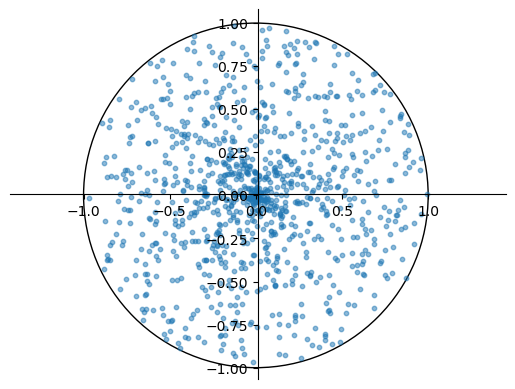

In [50]:
plt.axis([-2, 2, -2, 2])
plt.axis ("equal")
ax = plt.gca()

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

c=plt.Circle ((0, 0), 1, fill=False)
ax.add_artist(c)

x = [x for x, y in point_1]
y = [y for x, y in point_1]

plt.scatter(x, y, alpha=0.5, s=10);

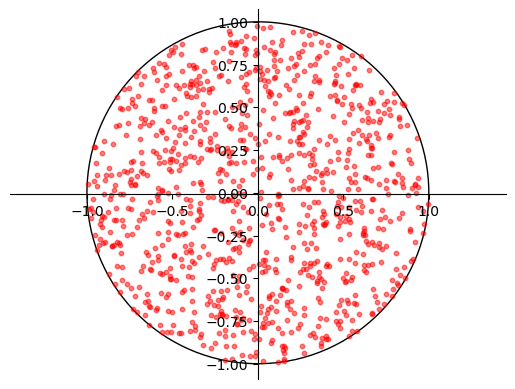

In [51]:
plt.axis([-2, 2, -2, 2])
plt.axis ("equal")
ax = plt.gca()

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

c=plt.Circle ((0, 0), 1, fill=False)
ax.add_artist(c)

x = [x for x, y in point_2]
y = [y for x, y in point_2]

plt.scatter(x, y, alpha=0.5, s=10, c='red');

## Посчитаем среднее разстояние от центра окружности до всех точек

In [57]:
r_1 = sum([x**2 + y**2 for x, y in point_1]) / len(point_1)
r_1

0.3273491129812272

In [58]:
r_2 = sum([x**2 + y**2 for x, y in point_2]) / len(point_2)
r_2

0.49858868381844357

## Проведем эксперемент и вычислим среднее

In [76]:
l1 = []
l2 = []

for _ in range(100):
    point_1 = [generate1() for _ in range(1000)]
    point_2 = [generate2() for _ in range(1000)]
    
    r_1 = sum([x**2 + y**2 for x, y in point_1]) / len(point_1)
    r_2 = sum([x**2 + y**2 for x, y in point_2]) / len(point_2)
    
    l1.append(r_1)
    l2.append(r_2)

In [77]:
sum(l1) / len(l1), min(l1), max(l1)

(0.33322557168920425, 0.31409144464120087, 0.3624714441017193)

In [78]:
sum(l2) / len(l2), min(l2), max(l2)

(0.4979016848584441, 0.47214344358543153, 0.522172543638375)

Граница разделения 0,45

In [79]:
threshold = 0.45

In [ ]:
for _ in range(100):
    line = map(float, input().split())
    point = []
    for i in range(0, 2000, 2):
        point.append((line[i], line[i+1]))
        
    r = sum([x**2 + y**2 for x, y in point]) / len(point)
    print(1 if r < threshold else 2)
        